In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Kousik C\Downloads\CARDETAILS.csv')
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


# EDA

In [2]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.fuel.value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [5]:
df.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [6]:
df.transmission.value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [7]:
df.seller_type.value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<Axes: >

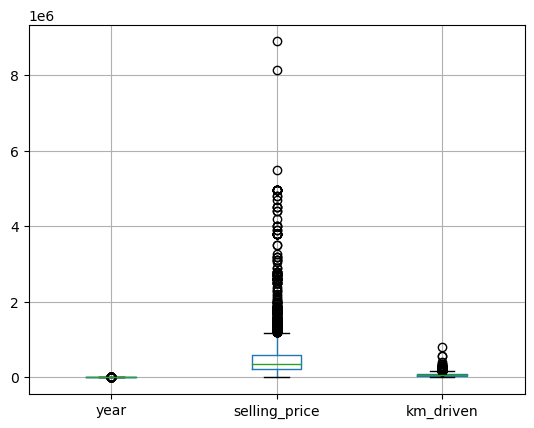

In [9]:
df.boxplot()

# DATA PREPROCESSING

In [10]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'owner':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}},inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
x=df.drop(['name','owner'],axis=1)

In [12]:
y=df['owner']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
x_sc = sc.fit_transform(x)

In [16]:
x_sc = pd.DataFrame(x_sc, columns=x.columns)

In [17]:
x_sc.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission
0,-1.445074,-0.767746,0.081139,-0.966844,-0.555591,-0.339276
1,-1.445074,-0.638096,-0.347689,-0.966844,-0.555591,-0.339276
2,-0.258795,0.165731,0.724381,0.852802,-0.555591,-0.339276
3,0.927485,-0.439300,-0.433455,-0.966844,-0.555591,-0.339276
4,0.215717,-0.093568,1.603479,0.852802,-0.555591,-0.339276


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
yle = le.fit_transform(y)

In [21]:
yle

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

# LOGISTIC REGRESSION

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sc, yle, test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
model = lr.fit(xtrain, ytrain)

C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
logreg_train_pred = model.predict(xtrain)
logreg_train_pred

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

In [28]:
logreg_test_pred = model.predict(xtest)

# Performance metric for Logistic Regression

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
logreg_train_acc = accuracy_score(ytrain, logreg_train_pred)

In [31]:
print("Logistic Regression Training - Accuracy Score: {}".format(logreg_train_acc))

Logistic Regression Training - Accuracy Score: 0.6800115207373272


In [32]:
logreg_test_acc = accuracy_score(ytest, logreg_test_pred)

In [33]:
print("Logistic Regression Testing - Accuracy Score: {}".format(logreg_test_acc))

Logistic Regression Testing - Accuracy Score: 0.695852534562212


In [34]:
logreg_train_cr = classification_report(ytrain, logreg_train_pred)

C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print("Logistic Regression Training - Classification Report \n", logreg_train_cr)

Logistic Regression Training - Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      0.91      0.81      2270
           2       0.44      0.34      0.38       882
           3       0.33      0.00      0.01       239
           4       1.00      0.01      0.03        67

    accuracy                           0.68      3472
   macro avg       0.50      0.25      0.25      3472
weighted avg       0.64      0.68      0.63      3472



In [36]:
logreg_test_cr = classification_report(ytest, logreg_test_pred)

C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kousik C\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print("Logistic Regression Testing - Classification Report \n", logreg_test_cr)

Logistic Regression Testing - Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.75      0.93      0.83       562
           2       0.49      0.37      0.42       224
           3       1.00      0.02      0.03        65
           4       0.00      0.00      0.00        14

    accuracy                           0.70       868
   macro avg       0.45      0.26      0.25       868
weighted avg       0.68      0.70      0.65       868



In [38]:
logreg_train_cm = confusion_matrix(ytrain, logreg_train_pred)

In [39]:
print("Logistic Regression Training - Confusion Matrix \n", logreg_train_cm)

Logistic Regression Training - Confusion Matrix 
 [[   0   14    0    0    0]
 [   0 2059  209    2    0]
 [   0  582  300    0    0]
 [   0  108  130    1    0]
 [   0   21   45    0    1]]


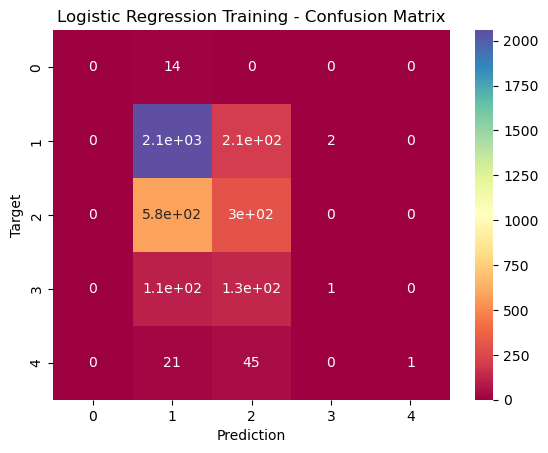

In [40]:
sns.heatmap(logreg_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Training - Confusion Matrix')
plt.show()

# DT Regressor Selling Price

In [41]:
x1=df.drop(['name','selling_price'],axis=1)

In [42]:
y1=df['selling_price']

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt = DecisionTreeRegressor()

In [45]:
x_sc1 = sc.fit_transform(x1)

In [46]:
x_sc1 = pd.DataFrame(x_sc1, columns=x1.columns)

In [47]:
yle1 = le.fit_transform(y1)

In [48]:
x1train, x1test, y1train, y1test = train_test_split(x_sc1, yle1, test_size=0.2)

In [49]:
dt_mod = dt.fit(x1train, y1train)

In [50]:
dt_train_pred = dt_mod.predict(x1train)

In [51]:
dt_train_pred

array([ 31.        , 262.16666667, 193.        , ..., 104.        ,
        57.        , 264.        ])

In [52]:
dt_test_pred = dt_mod.predict(x1test)

In [53]:
dt_test_pred

array([130.        ,  55.25      ,  99.        ,  57.8       ,
       222.        ,  80.        ,  88.5       ,  80.        ,
       215.        , 156.        ,  52.        , 161.        ,
       202.16666667, 252.        , 365.        , 178.        ,
       245.        , 161.        , 314.66666667, 222.        ,
       106.33333333,  39.2       , 285.        , 264.36363636,
       177.        , 421.        , 250.75      ,  20.        ,
       111.16666667, 177.        ,  77.        , 324.        ,
       133.375     , 153.5       , 171.66666667, 131.25      ,
       181.4       , 322.        , 122.        , 345.        ,
       384.        , 114.        , 211.2       ,  57.        ,
        81.14285714, 372.        , 130.        , 161.        ,
       149.        , 441.        , 203.        , 156.        ,
       228.66666667, 208.        , 217.        , 161.        ,
       191.        , 147.        , 264.        , 148.5       ,
       285.        ,  41.        , 106.28571429, 102.  

# Performance metrics for DT Regressor

In [54]:
mse = mean_squared_error(y1train, dt_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y1train, dt_train_pred)
r2 = r2_score(y1train, dt_train_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 926.6445845321314
Root Mean Squared Error (RMSE): 30.440837447943697
Mean Absolute Error (MAE): 15.065582023423326
R-squared (R2): 0.9111256537349286


In [55]:
mse = mean_squared_error(y1test, dt_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y1test, dt_test_pred)
r2 = r2_score(y1test, dt_test_pred)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 4217.0995821591505
Root Mean Squared Error (RMSE): 64.93919911855359
Mean Absolute Error (MAE): 43.92921323588086
R-squared (R2): 0.6077518267346447


# RANDOM FOREST REGRESSOR SELLING PRICE

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf=RandomForestRegressor()

In [58]:
x2=df.drop(['name','selling_price'],axis=1)

In [59]:
x2

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,1
1,2007,50000,0,0,0,1
2,2012,100000,1,0,0,1
3,2017,46000,0,0,0,1
4,2014,141000,1,0,0,2
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,2
4336,2014,80000,1,0,0,2
4337,2009,83000,0,0,0,2
4338,2016,90000,1,0,0,1


In [60]:
x_sc2 = sc.fit_transform(x2)

In [61]:
y2=df['selling_price']

In [62]:
x_sc2 = pd.DataFrame(x_sc2, columns=x2.columns)

In [63]:
yle2 = le.fit_transform(y2)

In [64]:
x2train, x2test, y2train, y2test = train_test_split(x_sc2, yle2, test_size=0.2)

In [65]:
rf_mod = rf.fit(x2train, y2train)

In [66]:
rf_train_pred = rf_mod.predict(x2train)

In [67]:
rf_train_pred

array([176.5878637 ,  18.5845    ,  38.91169048, ...,  34.15071429,
       141.68693817, 253.52906952])

In [68]:
rf_test_pred = rf_mod.predict(x2test)

In [69]:
rf_test_pred

array([297.7435    , 105.19502381, 293.51083333,  54.83134901,
       119.48685714,  68.54477778,  48.65275   , 126.63611977,
       171.        , 247.08347096,  55.04797619, 201.63875   ,
        60.27      , 208.97266667, 217.76021825, 172.62      ,
       228.66038095, 147.14      , 312.68313492, 305.0020754 ,
       160.71759524, 111.25043723, 117.17      ,  51.63533333,
       275.4       ,  95.78330952,  81.69544444, 429.03      ,
       116.37955952,  83.48316667, 198.41678319, 129.65548954,
       119.53680123, 192.2218676 ,  84.8435    , 197.0931042 ,
       127.7200202 , 116.30980952, 124.95766667,  81.37619048,
       176.97299276, 157.99361905, 125.52      , 254.48894444,
       245.        , 312.68313492, 178.61218651,  95.78330952,
       106.9817619 , 132.53492857, 279.785     , 223.51      ,
       220.39362446,  55.04797619, 262.17      , 179.02893434,
       165.00295425,  84.27347222,  48.93024206, 357.345     ,
       144.40079004,  61.79416667, 222.106     , 182.07

# Performance Metrics for Random Forest Regressor

In [70]:
mse = mean_squared_error(y2test, rf_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2test, rf_test_pred)
r2 = r2_score(y2test, rf_test_pred)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 3182.4369208305893
Root Mean Squared Error (RMSE): 56.41309175032502
Mean Absolute Error (MAE): 40.55362194470328
R-squared (R2): 0.6923993440157535


In [71]:
mse = mean_squared_error(y2train, rf_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2train, rf_train_pred)
r2 = r2_score(y2train, rf_train_pred)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1191.041702213291
Root Mean Squared Error (RMSE): 34.51147203776291
Mean Absolute Error (MAE): 23.30077033889053
R-squared (R2): 0.8868678648584155


# KNN MODEL AND OPTIMISATION

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x2train, y2train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [73]:
knn = KNeighborsRegressor(11)

In [74]:
knn.n_neighbors

11

In [75]:
knn_mod = knn.fit(x2train, y2train)

In [76]:
knn_train_pred = knn_mod.predict(x2train)
knn_train_pred

array([182.09090909,  48.90909091,  41.81818182, ...,  31.81818182,
       137.        , 253.63636364])

In [77]:
knn_test_pred = knn_mod.predict(x2test)
knn_test_pred

array([233.45454545,  95.36363636, 250.        ,  52.63636364,
       111.27272727, 107.90909091,  46.81818182, 119.81818182,
       188.63636364, 244.18181818,  56.54545455, 282.18181818,
       109.45454545, 226.18181818, 234.90909091, 183.90909091,
       178.81818182, 129.36363636, 273.90909091, 290.72727273,
       162.18181818,  86.        ,  98.36363636, 111.45454545,
       196.45454545, 154.36363636, 158.90909091, 433.        ,
       121.63636364,  78.63636364, 200.54545455, 153.27272727,
       141.36363636, 231.18181818,  86.36363636, 221.36363636,
       176.90909091, 135.54545455, 160.54545455,  98.90909091,
       167.18181818, 150.45454545, 138.18181818, 243.        ,
       247.        , 273.90909091, 190.36363636, 154.36363636,
       103.27272727, 104.27272727, 317.09090909, 250.        ,
       215.        ,  56.54545455, 239.72727273, 172.72727273,
       160.45454545, 115.54545455,  60.45454545, 383.        ,
       174.27272727,  55.72727273, 252.63636364, 165.63

In [78]:
mse = mean_squared_error(y2test, knn_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2test, knn_test_pred)
r2 = r2_score(y2test, rf_test_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 3297.9010263929617
Root Mean Squared Error (RMSE): 57.42735433913843
Mean Absolute Error (MAE): 42.906263091746965
R-squared (R2): 0.6923993440157535


In [79]:
mse = mean_squared_error(y2train, knn_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2train, knn_train_pred)
r2 = r2_score(y2train, rf_train_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 2813.85327960163
Root Mean Squared Error (RMSE): 53.045765897021695
Mean Absolute Error (MAE): 39.96258378718056
R-squared (R2): 0.8868678648584155


In [94]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x2test)
mse = mean_squared_error(y2test, y_pred)
r2 = r2_score(y2test, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("R2 Score on Test Set:", r2)


Mean Squared Error on Test Set: 3297.9010263929617
R2 Score on Test Set: 0.6812390805141755


# NAIVE BAYES Algorithm to predict Owner

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
nb = GaussianNB()

In [85]:
nb_mod = nb.fit(xtrain, ytrain)

In [86]:
nb_train_pred = nb_mod.predict(xtrain)
nb_train_pred

array([1, 3, 3, ..., 2, 1, 2], dtype=int64)

In [87]:
nb_test_pred = nb_mod.predict(xtest)
nb_test_pred

array([1, 4, 1, 1, 2, 3, 1, 1, 4, 4, 1, 2, 2, 4, 4, 4, 1, 1, 1, 1, 1, 4,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 4, 1, 1, 0, 4, 1, 1, 2, 1, 1, 2, 1, 3,
       4, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 2, 1, 0, 2, 2,
       2, 2, 1, 4, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 4, 1, 4, 4, 1, 2,
       1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 4, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 4, 1, 0, 2, 1, 1, 1, 4, 2, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 2, 2, 2,
       3, 2, 2, 4, 1, 1, 4, 2, 2, 2, 3, 0, 1, 0, 2, 2, 2, 1, 4, 2, 1, 0,
       1, 1, 2, 2, 0, 1, 2, 2, 4, 1, 1, 1, 2, 1, 4, 1, 2, 1, 1, 2, 4, 1,
       1, 4, 1, 4, 0, 1, 2, 1, 3, 0, 1, 1, 2, 4, 1, 2, 2, 1, 2, 1, 4, 1,
       1, 0, 1, 0, 1, 4, 2, 1, 1, 3, 1, 2, 3, 1, 2,

In [88]:
nb_train_acc = accuracy_score(ytrain, nb_train_pred)
print("Gaussian NB Training - Accuracy Score: {}".format(nb_train_acc))

Gaussian NB Training - Accuracy Score: 0.568836405529954


In [89]:
nb_test_acc = accuracy_score(ytest, nb_test_pred)
print("Gaussian NB Testing - Accuracy Score: {}".format(nb_test_acc))

Gaussian NB Testing - Accuracy Score: 0.565668202764977


In [90]:
nb_train_cr = classification_report(ytrain, nb_train_pred)
print("Gaussian NB Training - Classification Report: \n", nb_train_cr)

Gaussian NB Training - Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.19        14
           1       0.85      0.64      0.73      2270
           2       0.40      0.49      0.44       882
           3       0.26      0.10      0.15       239
           4       0.09      0.61      0.16        67

    accuracy                           0.57      3472
   macro avg       0.34      0.57      0.33      3472
weighted avg       0.68      0.57      0.60      3472



In [91]:
nb_test_cr = classification_report(ytest, nb_test_pred)
print("Gaussian NB Testing - Classification Report: \n", nb_test_cr)

Gaussian NB Testing - Classification Report: 
               precision    recall  f1-score   support

           0       0.09      1.00      0.16         3
           1       0.84      0.68      0.75       562
           2       0.39      0.44      0.42       224
           3       0.27      0.09      0.14        65
           4       0.02      0.14      0.03        14

    accuracy                           0.57       868
   macro avg       0.32      0.47      0.30       868
weighted avg       0.66      0.57      0.60       868



In [92]:
nb_train_cm = confusion_matrix(ytrain, nb_train_pred)
print("Gaussian NB Training - Confusion Matrix: \n", nb_train_cm)

Gaussian NB Training - Confusion Matrix: 
 [[  14    0    0    0    0]
 [ 117 1464  524   33  132]
 [   4  228  432   31  187]
 [   0   31  107   24   77]
 [   0    5   18    3   41]]


In [93]:
nb_test_cm = confusion_matrix(ytest, nb_test_pred)
print("Gaussian NB Testing - Confusion Matrix: \n", nb_test_cm)

Gaussian NB Testing - Confusion Matrix: 
 [[  3   0   0   0   0]
 [ 30 381 122   5  24]
 [  2  66  99   8  49]
 [  0   9  23   6  27]
 [  0   0   9   3   2]]
